In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Boston.csv')

In [ ]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [3]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN


In [4]:
df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'CAT. MEDV'], inplace = True)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


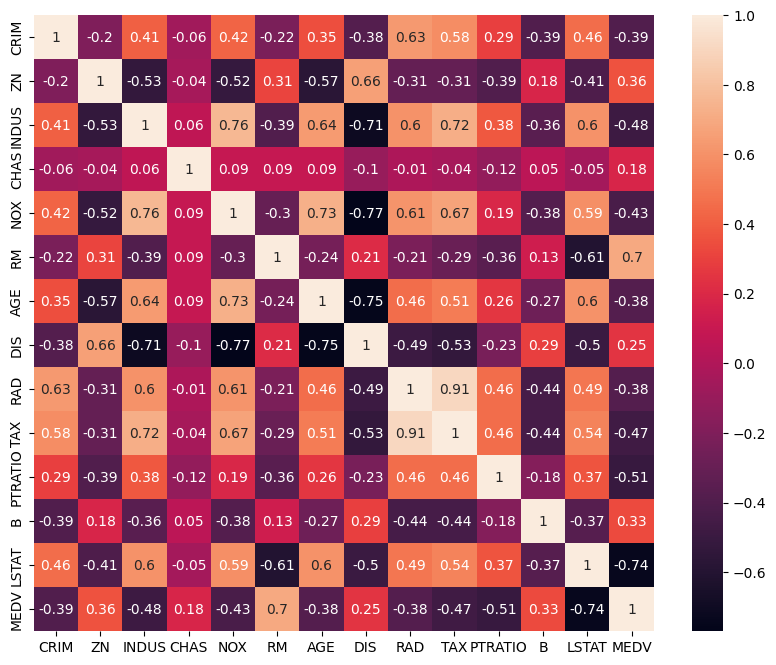

In [6]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


In [7]:
X = df.iloc[:, :-1]
Y = df.loc[:,"MEDV"]

In [8]:
# or
# column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
# x = df.loc[:,column_sels]
# y = df['MEDV']

In [9]:
X.shape, Y.shape

((506, 13), (506,))

In [12]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1,activation='linear')
])

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
 #Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.fit(X_scaled, Y, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
16/16 [==============================] - 1s 4ms/step - loss: 564.2471
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 472.7315
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 345.7333
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 197.4822
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 94.3802
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 60.7592
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 39.4951
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 29.2666
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 24.5841
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 22.3238
Epoch 11/100
16/16 [==============================] - 0s 6ms/step - loss: 20.7320
Epoch 12/100
16/16 [==============================] - 0s 3ms/step - loss: 19.3762
Epoch 13/100
16/16 [=

In [19]:
prediction=model.predict(x_test)


4/4 [==============================] - 0s 4ms/step


In [20]:
# Predict using the trained model
predictions = model.predict(X_scaled)


16/16 [==============================] - 0s 2ms/step


In [24]:
# Calculate and print the Mean Squared Error
# mse, mae = model.evaluate(x_test, y_test)

# print('Mean squared error on test data: ', mse)
# print('Mean absolute error on test data: ', mae)

4/4 [==============================] - 0s 4ms/step - loss: 4785781.0000


TypeError: cannot unpack non-iterable float object

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(Y, predictions)
print("\nMean Squared Error:", mse)
     


Mean Squared Error: 5.6892271270347665


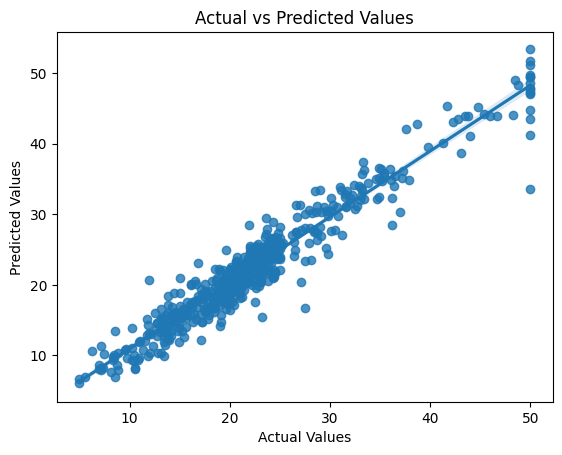

In [27]:
sns.regplot(x=Y, y=predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()